<a href="https://colab.research.google.com/github/devtruerimco/Mario-Game-Database/blob/main/Mario_Game_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This project is a relational database focused on the Mario franchise, organizing information about characters, additional details, sounds associated with characters, and specific actions each character can perform. Let's break down the components:

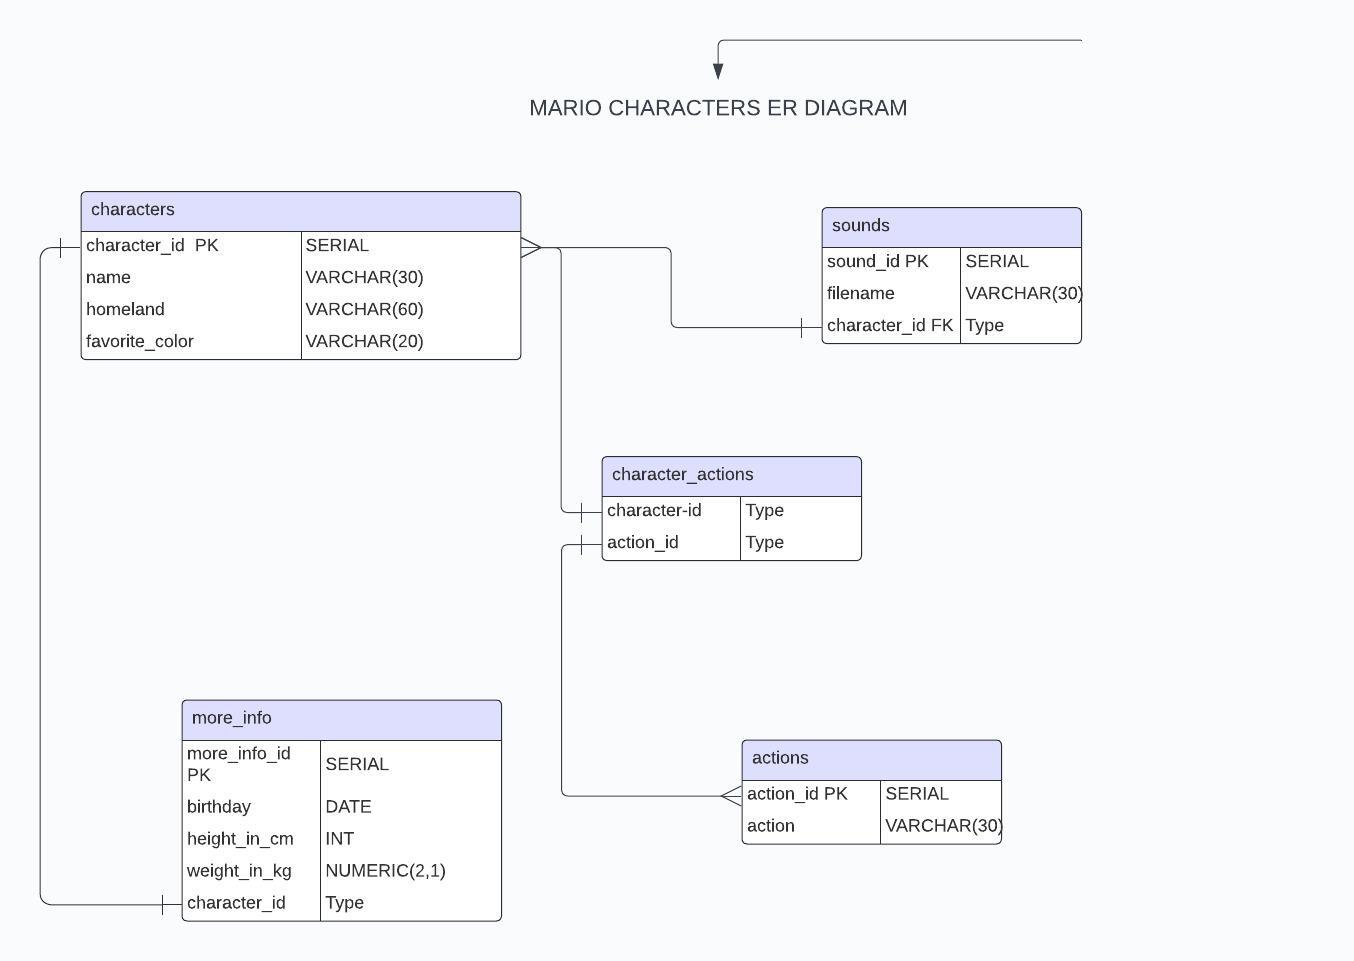


* More_info Table:

Stores detailed information about characters, such as birthday, height, weight, and a link to the character through the character_id.

* Characters Table:

Contains general details about each character, including their name, homeland, and favorite color.

* Sounds Table:

Lists sound files associated with specific characters, linking each sound to a character through the character_id.

* Actions Table:

Defines different actions that characters can perform, represented by unique action_id values.

* Character_actions Table:

Establishes a many-to-many relationship between characters and actions, indicating which actions each character can perform.

import sqlite3

In [ ]:
import sqlite3
from prettytable import PrettyTable

connect to a database or create one if it doesn't exist

In [ ]:
#import os
#os.remove("mariodatabase.db")

In [ ]:
conn= sqlite3.connect('mariodatabase.db')
conn.execute('PRAGMA foreign_keys = ON;')


Create a cursor object

In [ ]:
cursor = conn.cursor()


We define a pretty table function to reuse the code everytime we want to print a SELECT statement

In [ ]:
def print_formatted_table(query):
    """Executes a SELECT * query and prints a formatted table using PrettyTable."""

    cursor.execute(query)
    rows = cursor.fetchall()
    headers = [description[0] for description in cursor.description]

    table = PrettyTable(headers)
    for row in rows:
        table.add_row(row)

    print(table)


START EXECUTING QUERIES

In [ ]:
cursor.execute('''CREATE TABLE IF NOT EXISTS characters (
    character_id INTEGER PRIMARY KEY AUTOINCREMENT,
    name VARCHAR(20),
    place VARCHAR(30),
    favorite_color VARCHAR(20)
)''')

In [ ]:
cursor.execute("INSERT INTO characters (name, place, favorite_color) VALUES ('Mario', 'Mushroom Kingdom','Red')")
conn.commit()

In [ ]:
cursor.execute("SELECT * FROM characters")
print_formatted_table("SELECT * FROM characters")

+--------------+-------+------------------+----------------+
| character_id |  name |      place       | favorite_color |
+--------------+-------+------------------+----------------+
|      1       | Mario | Mushroom Kingdom |      Red       |
+--------------+-------+------------------+----------------+


In [ ]:
cursor.execute("ALTER TABLE characters RENAME place TO homeland")
conn.commit()

In [ ]:
print_formatted_table("SELECT * FROM characters")


+--------------+-------+------------------+----------------+
| character_id |  name |     homeland     | favorite_color |
+--------------+-------+------------------+----------------+
|      1       | Mario | Mushroom Kingdom |      Red       |
+--------------+-------+------------------+----------------+


In [ ]:
cursor.execute('''INSERT INTO characters(name, homeland, favorite_color) VALUES('Luigi','Mushroom Kingdom','Green'),
                                                                  ('Peach', 'Mushroom Kingdom','Pink'),
                                                                  ('Toad', 'Mushroom Kingdom','Blue'),
                                                                  ('Bowser', 'Koopa Kingdom','Yellllow'),
                                                                  ('Daisy','Sarasaland','Orange'),
                                                                  ('Yoshi', 'Dinosaur Land','Green')''')

We can view all the data we inserted in our characters table



In [ ]:
print_formatted_table("SELECT * FROM characters")

+--------------+--------+------------------+----------------+
| character_id |  name  |     homeland     | favorite_color |
+--------------+--------+------------------+----------------+
|      1       | Mario  | Mushroom Kingdom |      Red       |
|      2       | Luigi  | Mushroom Kingdom |     Green      |
|      3       | Peach  | Mushroom Kingdom |      Pink      |
|      4       |  Toad  | Mushroom Kingdom |      Blue      |
|      5       | Bowser |  Koopa Kingdom   |    Yellllow    |
|      6       | Daisy  |    Sarasaland    |     Orange     |
|      7       | Yoshi  |  Dinosaur Land   |     Green      |
+--------------+--------+------------------+----------------+


Here we notice that there is a spelling mistake in Bowser's favorite_color.Lets change that for now.

In [ ]:
cursor.execute('UPDATE characters SET favorite_color="Yellow" WHERE name="Bowser"')


In [ ]:
print_formatted_table("SELECT * FROM characters")

+--------------+--------+------------------+----------------+
| character_id |  name  |     homeland     | favorite_color |
+--------------+--------+------------------+----------------+
|      1       | Mario  | Mushroom Kingdom |      Red       |
|      2       | Luigi  | Mushroom Kingdom |     Green      |
|      3       | Peach  | Mushroom Kingdom |      Pink      |
|      4       |  Toad  | Mushroom Kingdom |      Blue      |
|      5       | Bowser |  Koopa Kingdom   |     Yellow     |
|      6       | Daisy  |    Sarasaland    |     Orange     |
|      7       | Yoshi  |  Dinosaur Land   |     Green      |
+--------------+--------+------------------+----------------+


Now it is time to add the **more_info** table to include more information about the charcaters from the previous table

In [ ]:
cursor.execute("CREATE TABLE more_info(more_info_id INTEGER PRIMARY KEY AUTOINCREMENT, birthday DATE, height INTEGER, weight INTEGER, character_id INTEGER, CONSTRAINT fk_character_info FOREIGN KEY (character_id) REFERENCES characters(character_id) )")

Lets update the primary key and insert a column **characters_id** as foreign key that references **character_id** from characters table

In [ ]:
print_formatted_table("SELECT * FROM more_info")

+--------------+----------+--------+--------+--------------+
| more_info_id | birthday | height | weight | character_id |
+--------------+----------+--------+--------+--------------+
+--------------+----------+--------+--------+--------------+


In [ ]:
cursor.execute("INSERT INTO more_info(birthday, height, weight, character_id) VALUES('1981-07-09',155, 64.5, 1)")

In [ ]:
print_formatted_table("SELECT * FROM more_info")

+--------------+------------+--------+--------+--------------+
| more_info_id |  birthday  | height | weight | character_id |
+--------------+------------+--------+--------+--------------+
|      1       | 1981-07-09 |  155   |  64.5  |      1       |
+--------------+------------+--------+--------+--------------+


In [ ]:
cursor.execute('''INSERt INTO more_info(birthday, height, weight, character_id) VALUES('1983-07-14',175, 48.8,2),
                                                                                      ('1985-10-18',173, 52.2,3),
                                                                                      ('1950-01-10',66, 35.6,4 ),
                                                                                      ('1990-10-29',258, 300,5),
                                                                                      ('1989-07-31',NULL,NULL ,6),
                                                                                      ('1990-04-13', 162, 59.1,7)''')

In [ ]:
print_formatted_table("SELECT * FROM more_info")

+--------------+------------+--------+--------+--------------+
| more_info_id |  birthday  | height | weight | character_id |
+--------------+------------+--------+--------+--------------+
|      1       | 1981-07-09 |  155   |  64.5  |      1       |
|      2       | 1983-07-14 |  175   |  48.8  |      2       |
|      3       | 1985-10-18 |  173   |  52.2  |      3       |
|      4       | 1950-01-10 |   66   |  35.6  |      4       |
|      5       | 1990-10-29 |  258   |  300   |      5       |
|      6       | 1989-07-31 |  None  |  None  |      6       |
|      7       | 1990-04-13 |  162   |  59.1  |      7       |
+--------------+------------+--------+--------+--------------+


We should probably rename the height and weight columns in more_info table to show the units of measurement as well

In [ ]:
cursor.execute("ALTER TABLE more_info RENAME height TO height_in_cms")
cursor.execute("ALTER TABLE more_info RENAME weight TO weight_in_kgs")

In [ ]:
print_formatted_table("SELECT * FROM more_info")

+--------------+------------+---------------+---------------+--------------+
| more_info_id |  birthday  | height_in_cms | weight_in_kgs | character_id |
+--------------+------------+---------------+---------------+--------------+
|      1       | 1981-07-09 |      155      |      64.5     |      1       |
|      2       | 1983-07-14 |      175      |      48.8     |      2       |
|      3       | 1985-10-18 |      173      |      52.2     |      3       |
|      4       | 1950-01-10 |       66      |      35.6     |      4       |
|      5       | 1990-10-29 |      258      |      300      |      5       |
|      6       | 1989-07-31 |      None     |      None     |      6       |
|      7       | 1990-04-13 |      162      |      59.1     |      7       |
+--------------+------------+---------------+---------------+--------------+


It is time to define and populate the sounds table that is references to the characters table with its own **character_id** foreign key.

One character can make many sounds like shown in the table below thus depicting a *ONE-TO_MANY* relationship

In [ ]:
cursor.execute("CREATE TABLE sounds(sound_id INTEGER PRIMARY KEY AUTOINCREMENT, filename VARCHAR(30), character_id INTEGER, CONSTRAINT fk_character_sound FOREIGN KEY (character_id) REFERENCES characters(character_id))")

In [ ]:
cursor.execute('''INSERT INTO sounds(filename, character_id) VALUES('its-a-me.wav',1),
                                                                    ('yippee.wav',1),
                                                                    ('ha-ha.wav',2),
                                                                    ('oh-yeah.wav',2),
                                                                    ('yay.wav',3),
                                                                    ('woo-hoo.wav',3),
                                                                    ('mm-hmm.wav',3),
                                                                    ('yahoo.wav',1)''')


In [ ]:
print_formatted_table("SELECT * FROM sounds")

+----------+--------------+--------------+
| sound_id |   filename   | character_id |
+----------+--------------+--------------+
|    1     | its-a-me.wav |      1       |
|    2     |  yippee.wav  |      1       |
|    3     |  ha-ha.wav   |      2       |
|    4     | oh-yeah.wav  |      2       |
|    5     |   yay.wav    |      3       |
|    6     | woo-hoo.wav  |      3       |
|    7     |  mm-hmm.wav  |      3       |
|    8     |  yahoo.wav   |      1       |
+----------+--------------+--------------+


In order to associate an action with each character we define an actions table with the actions available in the game.

The actions table won't have any foreign keys. It's going to have a "MANY-TO-MANY" relationship with the characters table. This is because many of the characters can perform many actions.

In [ ]:
cursor.execute("CREATE TABLE actions(action_id INTEGER PRIMARY KEY AUTOINCREMENT, action VARCHAR(20))")

In [ ]:
cursor.execute("INSERT INTO actions(action) VALUES('run'),('jump'),('duck')")

In [ ]:
print_formatted_table("SELECT * FROM actions")

+-----------+--------+
| action_id | action |
+-----------+--------+
|     1     |  run   |
|     2     |  jump  |
|     3     |  duck  |
+-----------+--------+


"Many-to-many" relationships usually use a junction table to link two tables together, forming two "one-to-many" relationships. **characters** and **actions** table will be linked using a junction table. We will call it "character_actions"

In [ ]:
cursor.execute('''CREATE TABLE character_actions(character_id INTEGER , action_id INTEGER,
CONSTRAINT fk_ca_characters FOREIGN KEY (character_id) REFERENCES characters(character_id),
CONSTRAINT fk_ca_actions FOREIGN KEY (action_id) REFERENCES actions(action_id))''')

In [ ]:
cursor.execute('''INSERT INTO character_actions(character_id, action_id) VALUES(7,1),(7,2),(7,3),
                                                                                     (6,1),(6,2),(6,3),
                                                                                     (5,1),(5,2),(5,3),
                                                                                     (4,1),(4,2),(4,3),
                                                                                     (3,1),(3,2),(3,3),
                                                                                     (2,1),(2,2),(2,3),
                                                                                     (1,1),(1,2),(1,3)''')

In [ ]:
print_formatted_table('SELECT * FROM character_actions')

+--------------+-----------+
| character_id | action_id |
+--------------+-----------+
|      7       |     1     |
|      7       |     2     |
|      7       |     3     |
|      6       |     1     |
|      6       |     2     |
|      6       |     3     |
|      5       |     1     |
|      5       |     2     |
|      5       |     3     |
|      4       |     1     |
|      4       |     2     |
|      4       |     3     |
|      3       |     1     |
|      3       |     2     |
|      3       |     3     |
|      2       |     1     |
|      2       |     2     |
|      2       |     3     |
|      1       |     1     |
|      1       |     2     |
|      1       |     3     |
+--------------+-----------+


In our junction table we observe that each character can perform all the three available actions.

We are now ready with the five required tables satisfying conditions of various relationships between them.

In [ ]:
##print function for JOINS where there is multiple occurence of column names


def print_joins(query):
  '''
  print function for JOINS where there is multiple occurence of column names

  '''
  rows= cursor.execute(query)

  column_names = cursor.description

  for column in column_names:
    print(column[0], end=' ')

  print('\n')
  for row in rows:
   print(row)

Retrieve character information with more_info

In [ ]:
print_joins('SELECT * FROM characters INNER JOIN more_info ON characters.character_id=more_info.character_id')

character_id name homeland favorite_color more_info_id birthday height_in_cms weight_in_kgs character_id 

(1, 'Mario', 'Mushroom Kingdom', 'Red', 1, '1981-07-09', 155, 64.5, 1)
(2, 'Luigi', 'Mushroom Kingdom', 'Green', 2, '1983-07-14', 175, 48.8, 2)
(3, 'Peach', 'Mushroom Kingdom', 'Pink', 3, '1985-10-18', 173, 52.2, 3)
(4, 'Toad', 'Mushroom Kingdom', 'Blue', 4, '1950-01-10', 66, 35.6, 4)
(5, 'Bowser', 'Koopa Kingdom', 'Yellow', 5, '1990-10-29', 258, 300, 5)
(6, 'Daisy', 'Sarasaland', 'Orange', 6, '1989-07-31', None, None, 6)
(7, 'Yoshi', 'Dinosaur Land', 'Green', 7, '1990-04-13', 162, 59.1, 7)


Retrieve characters and associated sounds

In [ ]:
print_joins('SELECT * FROM characters INNER JOIN sounds ON characters.character_id=sounds.character_id')


character_id name homeland favorite_color sound_id filename character_id 

(1, 'Mario', 'Mushroom Kingdom', 'Red', 1, 'its-a-me.wav', 1)
(1, 'Mario', 'Mushroom Kingdom', 'Red', 2, 'yippee.wav', 1)
(2, 'Luigi', 'Mushroom Kingdom', 'Green', 3, 'ha-ha.wav', 2)
(2, 'Luigi', 'Mushroom Kingdom', 'Green', 4, 'oh-yeah.wav', 2)
(3, 'Peach', 'Mushroom Kingdom', 'Pink', 5, 'yay.wav', 3)
(3, 'Peach', 'Mushroom Kingdom', 'Pink', 6, 'woo-hoo.wav', 3)
(3, 'Peach', 'Mushroom Kingdom', 'Pink', 7, 'mm-hmm.wav', 3)
(1, 'Mario', 'Mushroom Kingdom', 'Red', 8, 'yahoo.wav', 1)


Retrieve character and associated actions

In [ ]:
print_formatted_table('SELECT c.character_id, c.name, a.action FROM characters c JOIN character_actions ca ON c.character_id=ca.character_id JOIN actions a ON ca.action_id= a.action_id')


+--------------+--------+--------+
| character_id |  name  | action |
+--------------+--------+--------+
|      7       | Yoshi  |  run   |
|      7       | Yoshi  |  jump  |
|      7       | Yoshi  |  duck  |
|      6       | Daisy  |  run   |
|      6       | Daisy  |  jump  |
|      6       | Daisy  |  duck  |
|      5       | Bowser |  run   |
|      5       | Bowser |  jump  |
|      5       | Bowser |  duck  |
|      4       |  Toad  |  run   |
|      4       |  Toad  |  jump  |
|      4       |  Toad  |  duck  |
|      3       | Peach  |  run   |
|      3       | Peach  |  jump  |
|      3       | Peach  |  duck  |
|      2       | Luigi  |  run   |
|      2       | Luigi  |  jump  |
|      2       | Luigi  |  duck  |
|      1       | Mario  |  run   |
|      1       | Mario  |  jump  |
|      1       | Mario  |  duck  |
+--------------+--------+--------+


Retrieve action associated with only "Mario"

In [ ]:
print_formatted_table('SELECT c.character_id, c.name, a.action FROM characters c JOIN character_actions ca ON c.character_id=ca.character_id JOIN actions a ON ca.action_id= a.action_id WHERE name="Mario" ')


+--------------+-------+--------+
| character_id |  name | action |
+--------------+-------+--------+
|      1       | Mario |  run   |
|      1       | Mario |  jump  |
|      1       | Mario |  duck  |
+--------------+-------+--------+


Characters with no associated sounds

In [ ]:
print_formatted_table('SELECT c.character_id, c.name FROM characters c LEFT JOIN sounds s ON c.character_id=s.character_id WHERE s.character_id IS NULL')

+--------------+--------+
| character_id |  name  |
+--------------+--------+
|      4       |  Toad  |
|      5       | Bowser |
|      6       | Daisy  |
|      7       | Yoshi  |
+--------------+--------+


Retrieve characters with birthday between specific range(1985-1990)

In [ ]:
print_formatted_table('SELECT c.character_id, c.name, m.birthday FROM characters c INNER JOIN more_info m ON c.character_id=m.character_id WHERE m.birthday BETWEEN \'1985-01-01\'AND\'1990-12-31\'')

+--------------+--------+------------+
| character_id |  name  |  birthday  |
+--------------+--------+------------+
|      3       | Peach  | 1985-10-18 |
|      5       | Bowser | 1990-10-29 |
|      6       | Daisy  | 1989-07-31 |
|      7       | Yoshi  | 1990-04-13 |
+--------------+--------+------------+


Count the number of characters from each homeland

In [ ]:
print_formatted_table('SELECT homeland , COUNT(character_id) AS character_count FROM characters GROUP BY homeland')

+------------------+-----------------+
|     homeland     | character_count |
+------------------+-----------------+
|  Dinosaur Land   |        1        |
|  Koopa Kingdom   |        1        |
| Mushroom Kingdom |        4        |
|    Sarasaland    |        1        |
+------------------+-----------------+
